In [9]:
using Interact, Plots, DifferentialEquations, LinearAlgebra, BifurcationKit, Setfield
using NonLinearDynamicsCourse

# Flujos2D, Nulclinas

Para el Flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

los puntos fijos seran aquellos que satisfacen simultaneamente

$f(x,y) = 0$

$g(x,y) = 0$

Cada una de estas ecuaciones se puede ver como la forma implicita de una curva en el plano $(x,y)$ y se conoce como *nulclina*. Podemos representar esas dos curvas en el plano (la nulclina de $\dot{x}=0$ y la nulclina de $\dot{y}=0$). Los puntos fijos estaran entonces en los puntos donde se corten estas dos curvas. Claramente para el caso lineal las nulclinas son dos rectas que de forma generica se cortan en solo un punto. 

Vamos a ver un sistema no lineal simple como ejemplo para un calculo simple de las nulclinas

$\dot{x} = a-y$

$\dot{y} = x^2-y$

En este caso la primera nulclina es una recta horizontal en $y=a$ y la segunda nulclina es una parabola en el origen $y=x^2$. Para $a>0$ tenemos dos puntos fijos en $(x_*=-\sqrt{a},y_*=a)$ y en $(x_*=\sqrt{a},y_*=a)$

In [2]:
function nodosilla!(du,u,p,t)
    du[1] = p[1] - u[2]
    du[2] = u[1]*u[1] - u[2]
    du
end    

nodosilla! (generic function with 1 method)

## Representacion del flujo

Vamos a incorporar una representacion del espacio de fases bidimensional que nos va a ayudar a inferir el flujo, al menos en los casos mas simples, sin necesidad de integrar el sistema.

Vamos a representar las curvas nulclinas $\dot{x}=0$ en rojo y $\dot{y}=0$ en azul. Pero tambien vamos a diferenciar las regiones que dividen estas nulclinas con colores con transparencia. 

En el grafico de abajo la nulclina para $\dot{x}=0$ ($y=a$) es la linea horizontal en rojo y divide al espacio en dos regiones: una abajo $\dot{x}>0$ ($y<a$) que pintamos de verde (con transparencia) y otra arriba $\dot{x}<0$ ($y>a$) que pintamos de rojo.

La nuclina para $\dot{y}=0$ ($y=x^2$) es una parabola que tambien divide al espacio de fases en dos regiones que pintamos de azul para $\dot{y}<0$ ($y>x^2$) y amarillo para $\dot{y}>0$ ($y<x^2$). 

En combinacion con los colores transparentes de la nulclina anterior tenemos cuatro tipo de regiones:

- color verde + azul = cyan donde el flujo va hacia la derecha ($\dot{x}>0$) y abajo ($\dot{y}<0$)
- color verde + amarillo = verde donde el flujo va hacia la derecha ($\dot{x}>0$) y arriba ($\dot{y}>0$)
- color rojo + amarillo = naranja donde el flujo va hacia la izquierda ($\dot{x}<0$) y arriba ($\dot{y}>0$)
- color rojo + azul = magenta donde el flujo va hacia la izquierda ($\dot{x}<0$) y abajo ($\dot{y}<0$)

Nota que para pasar de la region naranja a la verde o de la cyan a la magenta hay que cruzar la nulclina roja y en la frontera todas las trayectorias son verticales (esto es porque ahi $\dot{x}=0$). Mientras que para cruzar de la region cyan a la verde o de la naranja a la magenta se cruza la nulclina azul y ah todas las trayectorias son horizontales (estrictamente sobre la nuclina $\dot{y}=0$). Al mismo tiempo no se puede pasar de la region verde a la magenta directo o de la azul a la naranja, salvo a traves de los puntos fijos.

Las dos nulclinas se cortan en los dos puntos fijos que calculamos anteriormente. Notar que en estos puntos fijos se encuentran las 4 regiones de colores (cuadruple frontera) y que estas regiones estan ordenadas azul > magenta > naranja > verde en sentido horario para el foco y antihorario para el punto silla

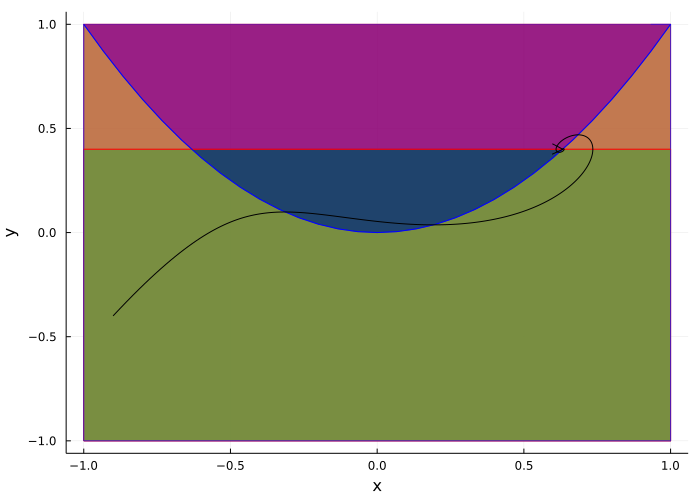

In [4]:
solve_plot_nullclines(nodosilla!,[-0.9;-0.4],30.0,[0.4])

# Oscilador de Duffing
 Asi como el Oscilador armónico (sistema lineal) se puede ver como el movimiento unidimensional de una particula en un pozo. El oscilador de Duffing corresponde al movimiento en un doble pozo (que de todas formas mediante un cambio de parametro se puede volver de pozo simple pero sin dejar de ser no lineal). 

<div>
<img src="../files/single_double_well.png" width="500px">
</div>
 
Un sistema fisico (si bien algo artificial) que tiene este comportamiento se puede armar con una lengueta metalica flexible puesta entre dos imanes:
<div>
<img src="../files/duffing.png" width="300px">
</div>

Si la potencia de los imanes no supera la rigidez de la lengueta tenemos la situacion de un unico pozo (si bien no es una oscilacion libre por la presencia de los imanes) y hay un solo atractor (el centro). Si la rigidez baja (o los imanes se acercan, o se ponen imanes mas potentes) hay dos situaciones de equilibrio estable (apuntando a uno u otro iman) separados por un punto inestable (que como vamos a ver mas adelante es un punto silla).

Las ecuaciones del oscilador de Duffing son las siguientes:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

En el caso de la lengueta con los imanes $x$ es la posicion horizontal de la punta, $y$ la velocidad (de ahi la primera ecuacion diferencial), $\gamma$ es la disipacion del aire y la friccion (igual que en el caso del resorte es una fuerza que se opone a la velocidad) y en $\beta$ esta resumida la relacion entre la fuerza de los imanes y la rigidez de la lengueta. Si $\beta$ es positivo ganan los imanes y si es negativo gana la rigidez. Notar que el termino cubico es el que termina ganando siempre, muy lejos del equilibro la fuerza es siempre atractiva, por lo tanto el sistema no va a explotar.

Este sistemita simple al ser forzado periodicamente presenta CAOS!

## Puntos fijos Oscilador de Duffing
Vamos a calcular los puntos fijos primero por el metodo de las nulclinas.

La primera nuclina es trivial, me da una recta horizontal $y=0$ con lo cual todos los puntos fijos van a estar sobre el eje $x$

La segunda nulclina se resuelve en una ecuacion cubica para $y$ en funcion de $x$:

$y = (\beta x - x^3)/ \gamma $

y recordemos que una cubica podia tener forma de "N" si el termino lineal y cubico tenian signo diferente ($\beta > 0$) o una doble curva suave si tenian el mismo signo ($\beta < 0$). $\gamma$ actua solo como factor de escala haciendo mas alta o mas baja la "N". 

<div>
<img src="../files/cubic.png" width="500px">
</div>

En este caso si bien usamos el metodo de las nulclinas como de la primera ecuacion sabemos que $y=0$ los puntos fijos van a ser las raices de esta cubica, es decir donde corte el eje horizontal. Por lo tanto basta con resolver 

$\beta x = x^3$

que tiene una solucion trivial $x^*_1=0$ y despues, solo para el caso de $\beta>0$ dos soluciones simetricas (que se obtienen dividiendo ambos miembros de la ecuacion anterior por $x$ ya que es diferente de 0) en 

$x^*_{2,3} = \pm \sqrt{\beta}$

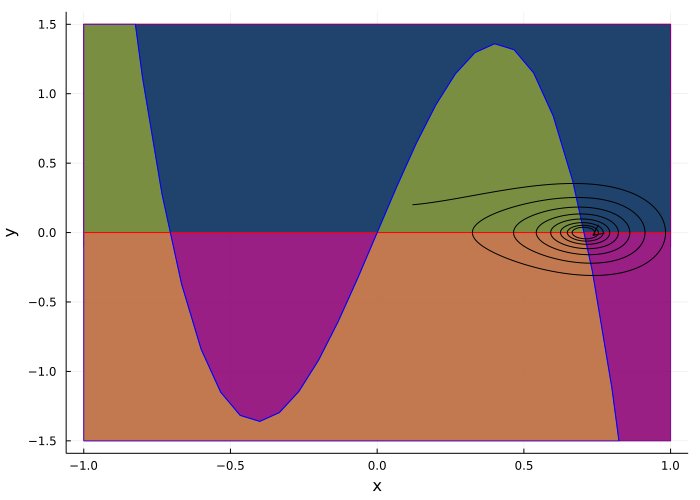

In [5]:
#definimos la Ed para el oscilador de Duffing
function duffing!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[2]+u[1]*(p[2]-u[1]*u[1])
    du
end    

solve_plot_nullclines(duffing!,[0.12;0.2],50.0,[0.1,0.5];ylims=[-1.5,1.5])

Notar que en este caso tenemos tres puntos fijos, por el ordenamiento de las regiones podemos saber que es un foco, un punto silla y un foco. 

In [8]:
@manipulate throttle=0.5 for x0=-1:0.1:1, y0=-1:0.1:1,β=-1.0:0.1:1.0,γ=0:0.01:1.0
    solve_plot_nullclines(duffing!,[x0;0],50.0,[γ,β];ylims=[-1.5,1.5])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008eaf52d0, Task (runnable) @0x000000008eaf52d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

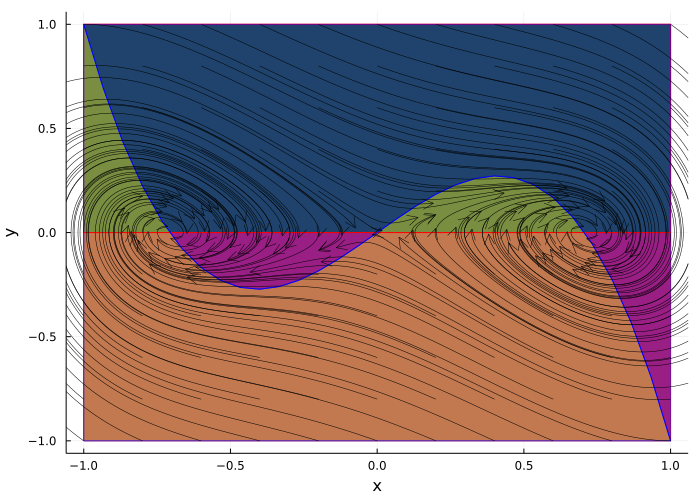

In [10]:
solve_plot_nullclines_flux(duffing!,5.0,[0.5,0.5])

# Flujos 2D, Linealizacion, Estabilidad

Los puntos fijos pueden ser de forma general de tipo silla, nodo/foco atractor/repulsor o centros. Esto es porque MUY cerca (arbitrariamente cerca para ser mas precisos) del punto fijo el campo vector se puede aproximar como un sistema lineal, donde los coeficientes de la matriz $A$ son las derivadas (parciales) de las funciones $f$ y $g$ con respecto a las dos variables. Esto es:

${\bf A} =
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$

tambien conocida como el *Jacobiano* del campo vector $[f,g]$

Por ejemplo para el primer caso que vimos con dos puntos fijos y nulclinas en forma de recta horizontal y parabola:

$f(x,y) = a-y$

$g(x,y) = x^2-y$

Calculamos cada una de las derivadas

$\frac{\partial f}{\partial x}=0 \quad$  ya que $f$ no depende de x

$\frac{\partial f}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

$\frac{\partial g}{\partial x}=2x \quad$  la derivada de la funcion cuadratica $x^2$ es $2x$

$\frac{\partial g}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

La matriz Jacobiana es entonces.

$
\begin{pmatrix}
0 & -1\\
2x & -1
\end{pmatrix}
$

esa matriz evaluada en los puntos fijos me dice como se comporta el flujo en un entorno local de los mismos. Por ejemplo en este caso para los puntos fijos la matriz va a ser

$
\begin{pmatrix}
0 & -1\\
-2\sqrt{a} & -1
\end{pmatrix}
$

para el punto fijo de la izquierda (x<0) y tiene determinante negativo asi que es un punto silla para todos los valores de $a>0$.

Y para el punto fijo de la derecha la matriz sera:

$
\begin{pmatrix}
0 & -1\\
2\sqrt{a} & -1
\end{pmatrix}
$

que tiene determinante positivo y traza negativa asi que es un atractor (dependiendo del valor de $a$ puede ser un foco o un nodo. 

Se puede verificar esto en el grafico interactivo para ver que cuando se crean los puntos fijos el atractor esta siempre a la derecha. OJO no confundir aca la pendiente de la parabola cuando corta la linea horizontal - nulclinas - con los graficos que haciamos de $f(x)$ para los Flujos 1D. Para calcular la estabilidad ahora hay que evaluar la matriz jacobiana y en el caso del punto de la derecha tiene determinante positivo y traza negativa por lo tanto es atractor, y eso no puede verse del grafico de las nulclinas.

# Variedades Estable e Inestable

Otra representacion que es muy util para inferir el flujo en todo el espacio de fases es la de las variedades estable e inestable de los puntos fijos (cuando son puntos sillas sobre todo). Las variedades en los flujos 2D son curvas tangentes a las direcciones determinadas por los autovectores del jacobiano (en el caso en el que sean reales). En particular las variedades estables de los puntos silla son relevantes porque actuan como separatrices del flujo. Para ilustralo mejor vamos a verlo en el caso del flujo nodo-silla anterior. Solo vamos a calcular las variedades del punto fijo de la izquierda que es un punto silla. Vamos a usar otra funcion de DNL_utils plot_manifolds, que necesita que le pasemos de forma explicita el jacobiano como una funcion in-place:

In [11]:
function nodosilla_jac(u,p) 
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = -1.0
  J[2,1] = 2*u[1]
  J[2,2] = -1.0
  return J
end

nodosilla_jac (generic function with 1 method)

In [12]:
@manipulate throttle=0.1 for a=0:0.001:0.5
    u0_array=[[-sqrt(a);a],[sqrt(a);a]]
    plot_manifolds(nodosilla!,nodosilla_jac,u0_array,[a];tmax=300,delta=1e-7,xlims=[-2,2],ylims=[-2,2])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
251, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000083e47080, Task (runnable) @0x0000000083e47080), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.001\",\"0.002\",\"0.003\",\"0.004\",\"0.005\",\"0.006\",\"0.007\",\"0.008\",\"0.009\",\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\",\"0.019\",\"0.02\",\"0.

# Estabilidad: Oscilador de Duffing

Vamos a estudiar ahora la estabilidad del Oscilador de Duffing:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

Que, como vimos, tiene un punto fijo siempre en $x^*_1=0$ y luego para $\beta>0$ un par de puntos fijos en $x^*_{2,3} = \pm \sqrt{\beta}$

El primer paso es calcular la matriz Jacobiana, lo hacemos paso por paso:

${\bf A} =
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$

Calculamos cada una de las derivadas

$\frac{\partial f}{\partial x}=0 \quad$  ya que $f$ no depende de x

$\frac{\partial f}{\partial y}=1 \quad$  ya que la derivada de una funcion lineal es la pendiente

$\frac{\partial g}{\partial x}=\beta-3x^2 \quad$  la derivada de la funcion cubica es $\beta-3x^2$, lo podemos verificar usando la funcion diff del modulo sympy

$\frac{\partial g}{\partial y}=-\gamma \quad$  ya que la derivada de una funcion lineal es la pendiente

La matriz Jacobiana es entonces.

$
\begin{pmatrix}
0 & 1\\
\beta-3x^2 & -\gamma
\end{pmatrix}
$

$\gamma$ es siempre positivo (dispacion), por lo tanto la traza es siempre negativa (sera atractor o punto silla dependiendo del determinante). 

Ahora hay que evaluarla en los puntos fijos.
La evaluamos primero en el punto fijo 

$x=0$.

$
\begin{pmatrix}
0 & 1\\
\beta & -\gamma
\end{pmatrix}
$

el determinante es $-\beta$. Es simple, cuando tenemos un punto fijo $\beta<0$, el determinante es positivo el punto fijo es atractor (la traza es siempre negativa). Es tiene sentido porque es la situacion en la que la lengueta no llega a ser atraida por los imanes y se queda piola en el centro.
En cambio cuando tenemos tres puntos fijos ($\beta>0$) este pasa a ser el del medio y el determinante es negativo por lo tanto es un punto silla. 

Veamos ahora el caso de los otros dos puntos fijos, notando que como en el Jacobiano aparece solo $x^2$, los dos puntos fijos tienen el mismo Jacobiano:

$x=\pm \sqrt{\beta}$.

$
\begin{pmatrix}
0 & 1\\
-2\beta & -\gamma
\end{pmatrix}
$

el determinante es $2\beta$, o sea tiene el signo inverso que el del determinate del Jacobiano del punto fijo del medio, lo cual una vez mas tiene sentido porque cuando hay tres puntos fijos vimos que ese punto se transforma en un punto silla y los puntos en $x=\pm \sqrt{\beta}$ solo existen para $\beta>0$, o sea tienen siempre determinate positivo (y traza negativa siempre) por lo tanto son atractores. Es decir que para el caso de tres puntos fijos tenemos un punto silla en el medio separando dos atractores.

El punto silla es en cierta forma un punto fijo inestable, en la direccion del movimiento, porque si trato de poner la lengueta en el medio cuando los imanes atraen mucho no se queda en ese sitio y se va para uno de los dos atractores (que obviamente son los imanes). Pero no es un repulsor, ya que todo el sistema es atractor globalmente, si una trayectoria pasa por el centro inestable va a perder velocidad por la friccion y el sistema va a ir decayendo. En el caso de mucho friccion ($\gamma$ muy alto) el sistema va pareciendose cada vez mas a un sistema 1D (verlo en el grafico interactivo)

In [15]:
function duffing_jac(u,p)
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = p[2]-2.0*u[1]*u[1]
  J[2,2] = -p[1]
  return J
end

duffing_jac (generic function with 1 method)

In [16]:
@manipulate throttle=0.1 for β=0:0.001:0.5,γ=0:0.001:0.5,tmax=10:10:300
    u0_array= [[-sqrt(β);0],[0;0],[sqrt(β);0]]
    plot_manifolds(duffing!,duffing_jac,u0_array,[γ,β];tmax=tmax,delta=1e-6,xlims=[-2,2],ylims=[-2,2])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
251, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000834a6a40, Task (runnable) @0x00000000834a6a40), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.001\",\"0.002\",\"0.003\",\"0.004\",\"0.005\",\"0.006\",\"0.007\",\"0.008\",\"0.009\",\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\",\"0.019\",\"0.02\",\"0.

# Retrato de Fases Completo

In [19]:
@manipulate throttle=0.1 for β=-0.5:0.001:0.5,γ=0:0.001:0.5
    phase_portrait(duffing!,[γ,β];xlims=[-2.0,2.0],ylims=[-2.0,2.0])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 1001, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
501, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008ef4d140, Task (runnable) @0x000000008ef4d140), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.499\",\"-0.498\",\"-0.497\",\"-0.496\",\"-0.495\",\"-0.494\",\"-0.493\",\"-0.492\",\"-0.491\",\"-0.49\",\"-0.489\",\"-0.488\",\"-0.487\",\"-0.486\",\"-0.485\",\"-0.484\",\"-0.483\",\"-0.482\",\"-